In [166]:
import numpy as np
from numpy import inf
from scipy import integrate
from scipy.integrate import quad
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
import sympy as sym
mpl.style.use('classic')
import math
%matplotlib inline

In [167]:
kpc = 3.086e21
M_solar = 1.99e33
G = 6.67e-8 # cgs
Myr = 3.156e13

mBH = 2.6e6*M_solar
M_vir = 1.e12*M_solar
Mb_vir = 6.e10*M_solar

rd = 3.*kpc
r_vir = 258.*kpc
C = 12.
rs = (r_vir/C)

def func(x):
    func = math.log(1.+x) - (x/(1.+x))
    return func

def M_b(x):
    x_k = x/kpc
    Mb = mBH \
        + 0.025*Mb_vir*(1.-math.exp(-2.64*(x_k**1.15))) \
        + 0.142*Mb_vir*(1.-(1.+x_k**1.5)*math.exp(-x_k**1.5)) \
        + 0.833*Mb_vir*(1.-(1.+x/rd)*math.exp(-x/rd))            # x is in cm, x_k is in kpc
    return Mb

def M_dm(x):
    x1 = x/rs
    Mdm = M_vir*func(x1)/func(C)
    return Mdm

def M_tot(x):
    return (M_b(x)+M_dm(x))
    
def dphi(x):
    return G*delM_dr(x)/x
    
def phi(x):
    if (x >= r_vir):
        V = -G*M_tot(x)/x
    else:
        V1 = -G*M_tot(x)/x
        V2 = -quad(dphi,x,r_vir)[0]
        V = V1+V2
    return V

def delphi_dr(x):
    return G*M_tot(x)/x**2

def V_c(x):
    return math.sqrt(x*delphi_dr(x))

def dlnVc_dlnr(x):
    return (x/V_c(x))*dVc_dr(x)

def dVc_dr(x):
    return (1./(2.*V_c(x)))*(delphi_dr(x)+x*del2phi_dr2(x))

def del2phi_dr2(x):
    return (G/x**2)*delM_dr(x)-2.*G*M_tot(x)/x**3

def delM_dr(x):
    return dMb_dr(x)+dMdm_dr(x)

def dMdm_dr(x):
    x1 = x/rs
    return (M_vir/(func(C)*rs))*(x1/(1+x1)**2)

def dMb_dr(x):
    x_k = x/kpc
    term1 = 0.
    term2 = 0.025*Mb_vir*2.64*1.15*(x_k**0.15)*math.exp(-2.64*x_k**1.15)*(1./kpc)
    term3 = 0.142*Mb_vir*1.5*(x_k**2)*math.exp(-x_k**1.5)*(1./kpc)
    term4 = 0.833*Mb_vir*(x/rd**2)*math.exp(-x/rd)   # x is in cm, x_k is in kpc
    return (term1+term2+term3+term4)



In [168]:
xbegin = 0.2*kpc
#xend = 282.74*kpc
xend = 1000.*kpc
x_nsamples = 10000
x_space = np.linspace(xbegin, xend, x_nsamples)
dx = x_space[1]-x_space[0]
print(dx/kpc)

Vc = np.zeros(x_nsamples)

check_ana = np.zeros(x_nsamples)
check_num = np.zeros(x_nsamples)
pot = np.zeros(x_nsamples)
Mb = np.zeros(x_nsamples)
Mdm = np.zeros(x_nsamples)
Mass = np.zeros(x_nsamples)

for i in range (0, x_nsamples, 1):
    r = x_space[i]
    Vc[i] = V_c(r)
    check_ana[i] = dlnVc_dlnr(r)
    pot[i] = phi(r)
    Mb[i] = M_b(r)
    Mdm[i] = M_dm(r)
    Mass[i] = M_tot(r)
    
check_num = np.gradient(Vc, dx)*(x_space/Vc)

0.09998999899990002


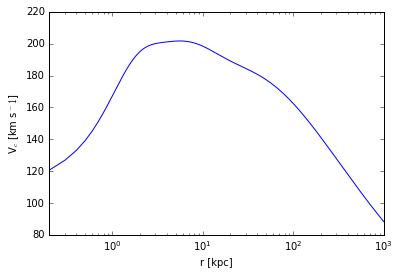

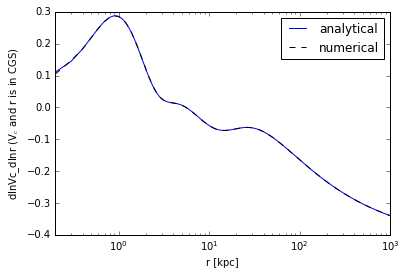

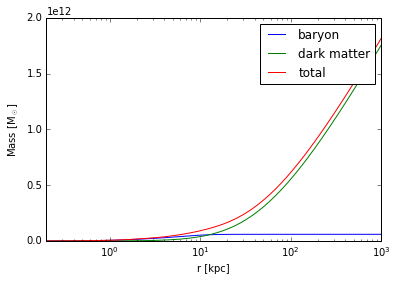

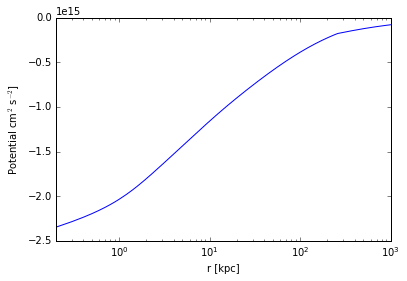

In [169]:
plt.figure(1)
plt.xlim ([0.2,1000])
plt.xscale('log')
plt.plot(x_space/kpc, Vc/1.e5, linewidth=1)
plt.xlabel('r [kpc]')
plt.ylabel('V$_c$ [km s$^-1$]')

plt.figure(2)
plt.xlim([0.2,1000])
plt.xscale('log')
plt.xlabel('r [kpc]')
plt.ylabel('dlnVc_dlnr (V$_c$ and r is in CGS)') #Vc is in cm s^-1 and r is in cm
plt.plot(x_space/kpc, check_ana, linewidth=1, label = 'analytical')
plt.plot(x_space/kpc, check_num, linewidth=1, label = 'numerical', linestyle = '--', color= 'k')
plt.legend()

plt.figure(3)
plt.xlim([0.2,1000])
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('r [kpc]')
plt.ylabel('Mass [M$_\odot$]')
plt.plot(x_space/kpc, Mb/M_solar, linewidth=1, label = 'baryon')
plt.plot(x_space/kpc, Mdm/M_solar, linewidth=1, label = 'dark matter')
plt.plot(x_space/kpc, Mass/M_solar, linewidth=1, label = 'total')
plt.legend()

plt.figure(4)
plt.xlim([0.2,1000])
#plt.ylim([-5.e35,1.e35])
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('r [kpc]')
plt.ylabel('Potential cm$^{2}$ s$^{-2}$]')
plt.plot(x_space/kpc, pot, linewidth=1, label = 'baryon')

